In [67]:
import pandas as pd
import numpy as np
data = pd.read_csv("100k_a.csv")
data["rate"] = data["156"] - data["154"]
data["rate"].describe()
data

,1,33842865744,mithrain,154,156,rate
0,1,33846768288,alptv,166,169,3
1,1,33886469056,mithrain,587,588,1
2,1,33887624992,wtcn,589,591,2
3,1,33890145056,jrokezftw,591,594,3
4,1,33903958784,berkriptepe,734,737,3
...,...,...,...,...,...,...
3051727,100000,34167930576,mckytv,3582,3583,1
3051728,100000,34168288656,natehill,3582,3583,1
3051729,100000,34169594512,fortnite,3582,3584,2
3051730,100000,34180223072,highdistortion,3709,3711,2


In [68]:
len(data["mithrain"].unique())
data["mithrain"].unique().shape

(162625,)

In [69]:
rate_number = pd.DataFrame(data.groupby("mithrain")["rate"].count())
rate_number["mean"] = pd.DataFrame(data.groupby("mithrain")["rate"].mean())
rate_number["value"] = rate_number["rate"]*rate_number["mean"]
rate_number = rate_number.sort_values(by='value', ascending=False)
print(rate_number)
rate_number.describe()

                 rate      mean     value
mithrain                                 
ninja           45144  2.469741  111494.0
tfue            40136  2.657764  106672.0
shroud          27362  2.738616   74934.0
riotgames       17633  4.034934   71148.0
asmongold       13186  4.100561   54070.0
...               ...       ...       ...
brunobsixx          1  1.000000       1.0
messy_cat           1  1.000000       1.0
stengertgaming      1  1.000000       1.0
stenholtma          1  1.000000       1.0
diffkqhd            1  1.000000       1.0

[162625 rows x 3 columns]


,rate,mean,value
count,162625.000000,162625.000000,162625.000000
mean,18.765454,2.696678,58.962085
std,251.414619,2.508225,772.250119
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,4.000000
75%,5.000000,3.225352,15.000000
max,45144.000000,52.000000,111494.000000


In [70]:
new_rate_number = rate_number[rate_number["rate"]>= 50]
x = new_rate_number.index
new_rate_number

,rate,mean,value
mithrain,,,
ninja,45144,2.469741,111494.0
tfue,40136,2.657764,106672.0
shroud,27362,2.738616,74934.0
riotgames,17633,4.034934,71148.0
asmongold,13186,4.100561,54070.0
...,...,...,...
vrchallenger,51,1.274510,65.0
kaku_live,51,1.254902,64.0
humanilliance,51,1.254902,64.0


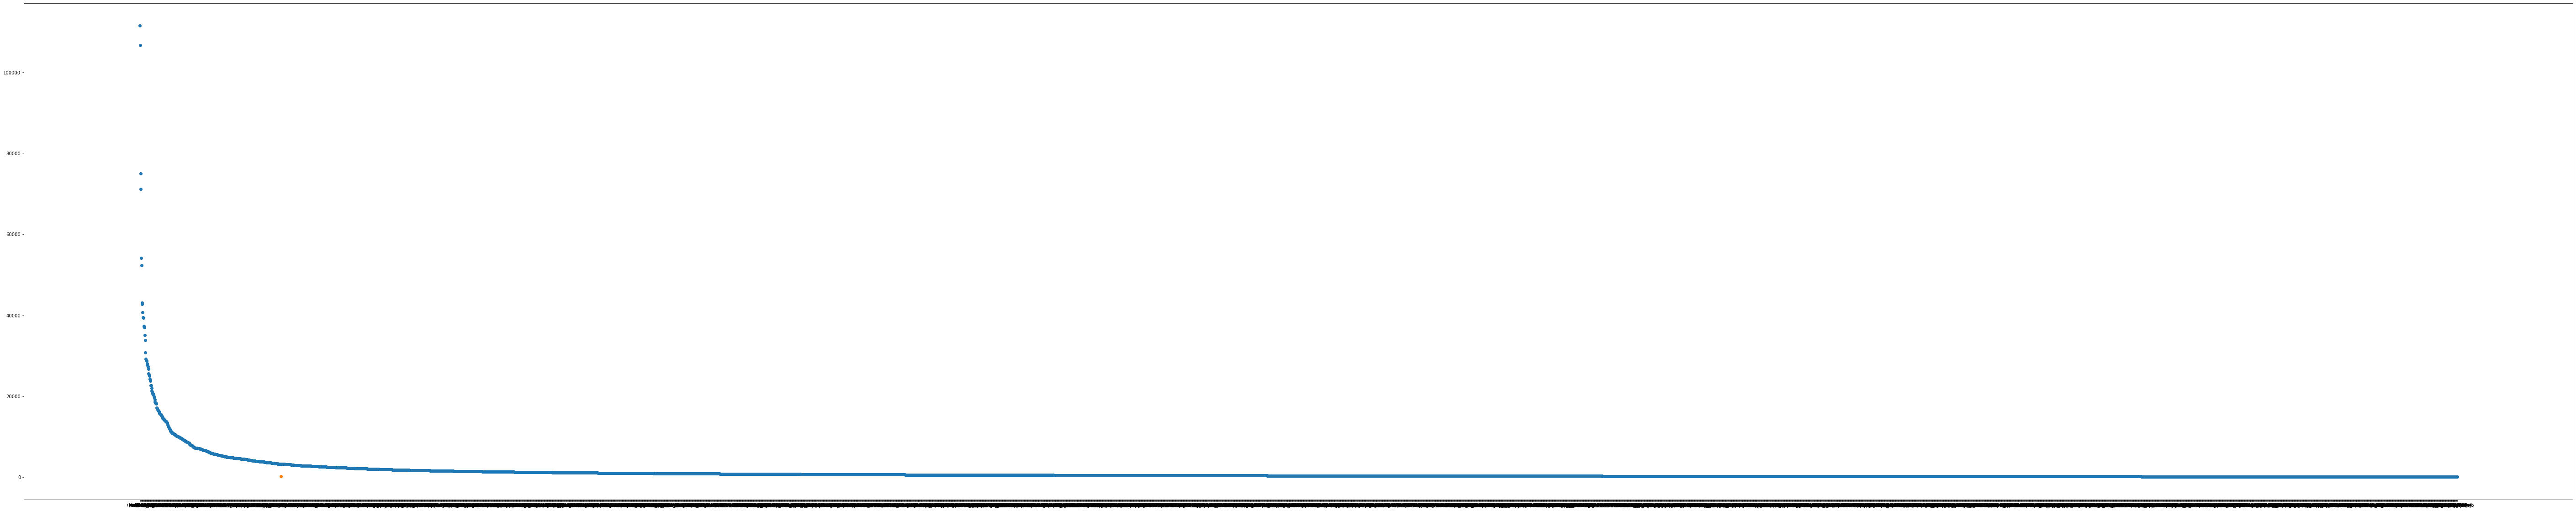

In [71]:
import matplotlib.pyplot as plt
plt.scatter(x , new_rate_number["value"])
plt.scatter(x[400],200)
plt.gcf().set_size_inches(100, 20)
plt.show()

In [7]:
top_rate = new_rate_number
#print(top_rate)
body = pd.merge(top_rate ,data , on = "mithrain")
body

,mithrain,rate_x,mean,value,1,33842865744,154,156,rate_y
0,ninja,45144,2.469741,111494.0,4,34151273824,3429,3430,1
1,ninja,45144,2.469741,111494.0,9,34306403232,5013,5015,2
2,ninja,45144,2.469741,111494.0,9,34350295120,5447,5448,1
3,ninja,45144,2.469741,111494.0,11,34347389248,5410,5411,1
4,ninja,45144,2.469741,111494.0,22,33981817072,1566,1568,2
...,...,...,...,...,...,...,...,...,...
2367970,r16diabolik,52,1.057692,55.0,94805,34094764336,2728,2729,1
2367971,r16diabolik,52,1.057692,55.0,94805,34107379248,2877,2878,1
2367972,r16diabolik,52,1.057692,55.0,96869,34079121424,2587,2588,1
2367973,r16diabolik,52,1.057692,55.0,96869,34094764336,2742,2743,1


In [8]:
table = pd.pivot_table(body, values='1', index= "rate_y" , columns = "mithrain")
table = table.fillna(0)
table

mithrain,0nuqtive,10000days,100poison,109ace,10tnsqls,111fox,123lunatic,14henriquetv,14studio,1983kej,...,zulu,zulzorander,zumi,zunit,zuthar13,zvonimirtv,zwag,zyrios7,zzamtiger0310,zzzerrr
rate_y,,,,,,,,,,,,,,,,,,,,,
1,50670.434783,49235.953863,37557.025000,55409.951456,49908.324324,63615.454545,46862.642857,51627.434783,54476.055556,50632.166667,...,53563.397959,51155.652778,49398.161290,57881.181818,39933.304348,47894.630769,54727.013514,46201.192308,54031.247642,47935.472222
2,59888.866667,47941.825455,57338.727273,58144.312000,48305.000000,82653.400000,63751.153846,46726.636364,54038.500000,46356.000000,...,59589.151515,52441.875000,47837.000000,52663.235294,43589.818182,56980.157895,54221.465116,61671.058824,50091.934959,31194.000000
3,35817.800000,49094.809859,15456.285714,58026.596774,65522.000000,74039.583333,60719.400000,47020.600000,44536.666667,50778.666667,...,51814.500000,45952.400000,59273.125000,59746.250000,63481.000000,48226.500000,44884.305556,64341.000000,54088.250000,43935.000000
4,19233.000000,44730.357143,78060.000000,54056.459459,72596.600000,57362.666667,46245.800000,34629.800000,60776.000000,53320.000000,...,45839.833333,77166.000000,53143.285714,49028.000000,24310.400000,61052.800000,53504.842105,80922.500000,52410.877551,79595.000000
5,47313.500000,45415.764706,42336.500000,54351.500000,35322.000000,63129.000000,74876.400000,31594.500000,69325.000000,63617.000000,...,45241.857143,72291.800000,32728.500000,44568.000000,18474.750000,54760.000000,49127.777778,96437.000000,54596.814815,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
88,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
matrix = np.corrcoef(table.T)
matrix = pd.DataFrame(matrix, columns = table.columns , index = table.columns)
matrix

mithrain,0nuqtive,10000days,100poison,109ace,10tnsqls,111fox,123lunatic,14henriquetv,14studio,1983kej,...,zulu,zulzorander,zumi,zunit,zuthar13,zvonimirtv,zwag,zyrios7,zzamtiger0310,zzzerrr
mithrain,,,,,,,,,,,,,,,,,,,,,
0nuqtive,1.000000,0.610515,0.437669,0.458142,0.405512,0.309858,0.720324,0.545387,0.496172,0.630596,...,0.532106,0.632393,0.474718,0.639753,0.628324,0.355672,0.476936,0.707479,0.512867,0.244504
10000days,0.610515,1.000000,0.393799,0.770784,0.553967,0.541034,0.687043,0.622468,0.511801,0.604327,...,0.608450,0.656290,0.667975,0.616057,0.737681,0.519011,0.723408,0.705650,0.725162,0.515759
100poison,0.437669,0.393799,1.000000,0.405947,0.694069,0.452760,0.547639,0.642103,0.862595,0.688740,...,0.438655,0.442935,0.465032,0.477206,0.322962,0.263894,0.281012,0.505714,0.440023,0.411560
109ace,0.458142,0.770784,0.405947,1.000000,0.582689,0.751628,0.589828,0.582011,0.523542,0.541091,...,0.596431,0.703757,0.727278,0.581035,0.598807,0.614543,0.645853,0.674136,0.751470,0.560466
10tnsqls,0.405512,0.553967,0.694069,0.582689,1.000000,0.710710,0.592538,0.801058,0.863089,0.629014,...,0.732691,0.603080,0.699617,0.562147,0.584698,0.284805,0.438967,0.725586,0.626377,0.458452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zvonimirtv,0.355672,0.519011,0.263894,0.614543,0.284805,0.370871,0.376917,0.320123,0.300903,0.394239,...,0.427089,0.557281,0.485009,0.254578,0.371963,1.000000,0.483771,0.455962,0.590497,0.292850
zwag,0.476936,0.723408,0.281012,0.645853,0.438967,0.542923,0.529216,0.451273,0.366110,0.404672,...,0.569348,0.681483,0.488239,0.459405,0.548368,0.483771,1.000000,0.581973,0.512520,0.602290
zyrios7,0.707479,0.705650,0.505714,0.674136,0.725586,0.621492,0.785932,0.670770,0.655708,0.606863,...,0.755411,0.792965,0.719969,0.754650,0.726523,0.455962,0.581973,1.000000,0.740747,0.336341


In [61]:
def for_you(User_ID):
    your_rates = data[data["1"] == User_ID]
    your_rates = your_rates.loc[: , ["mithrain", "rate"]]
    list = []
    for i in your_rates.index:
        your_rate = your_rates.loc[i]  
        list1 = matrix.columns.values.tolist()
        #print(your_rate)
        if list1.count(your_rate[0]) != 0:
            list.append(matrix[your_rate[0]]*your_rate[1])
    if len(list) == 0 :
        return "The channels you have viewed are not large enough that we can give you a good offer, but we recommend that you watch our most popular channel called *Ninja*."   
    list = np.array(list)
    list = pd.DataFrame(list , columns = matrix.columns.values)
    sum_rates = list.sum(axis = 0, skipna = True)
    sum_rates = sum_rates.sort_values( ascending=False)
    chanels_list = your_rates["mithrain"].tolist()
    for t in range(len(sum_rates)):
        if chanels_list.count(p.index[t]) == 0:
            return "We suggest you *"+sum_rates.index[t]+"* chanel :)"
            break
    #print(sum_rates)

In [72]:
x = int(input(""". ما اینجا 10000 کاربر داریم که هر کاربر یک عدد بین ۱ تا 10000 عدد بهش اختصاص داده شده.
شما عدد کاربر مورد نظر رو وارد کنید و ما باتوجه به کانال هایی که مشاهده کرده به شما بهترین گزینه بعدی را ارايه می دهیم"""))
if 1 <= x <= 10000:
    print()
    print(for_you(x))

. ما اینجا 10000 کاربر داریم که هر کاربر یک عدد بین ۱ تا 10000 عدد بهش اختصاص داده شده.
شما عدد کاربر مورد نظر رو وارد کنید و ما باتوجه به کانال هایی که مشاهده کرده به شما بهترین گزینه بعدی را ارايه می دهیم2

We suggest you *sal_gu* chanel :)
